In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import defaultdict
import math
from itertools import islice

warnings.filterwarnings("ignore")

In [2]:
data = dict()
years = {"2017","2018","2019","2020","2021"}

data["2017"] = [pd.read_csv("data/2017/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI")]
data["2018"] = [pd.read_csv("data/2018/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2018/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2018/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2018/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]
data["2019"] = [pd.read_csv("data/2019/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2019/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]
data["2020"] = [pd.read_csv("data/2020/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2020/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2020/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2020/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2020/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]
data["2021"] = [pd.read_csv("data/2021/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2021/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2021/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

## Število tehničnih pregledov na leto

In [3]:
neuspesni_tehnicni_per_year = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0]]

tehnicni_per_year = [data["2017"][1].shape[0], data["2018"][1].shape[0], data["2019"][1].shape[0], data["2020"][1].shape[0], data["2021"][1].shape[0]]
tehnicni_zip = zip(tehnicni_per_year, neuspesni_tehnicni_per_year)
procent_uspesnosti = []
for stevilo, neuspesni in tehnicni_zip:
    procent_uspesnosti.append((stevilo-neuspesni) / stevilo)

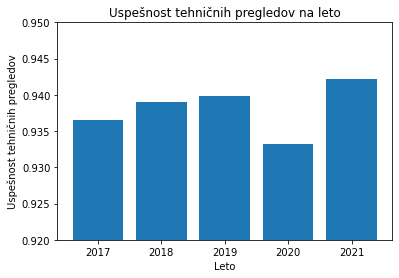

In [4]:

fig, ax = plt.subplots()
plt.ylim(0.92, 0.95)
ax.bar(data.keys(), procent_uspesnosti,)
ax.set_xlabel("Leto")
ax.set_ylabel("Uspešnost tehničnih pregledov")
ax.set_title("Uspešnost tehničnih pregledov na leto")
plt.show()
#data["2017"][1]["TEHNICNI_PREGLED_STATUS"].unique()
#data["2017"][0].shape[0]

In [5]:
neuspesno_opravljeni = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')]]

In [6]:
lastnosti = data["2017"][1].columns.values.tolist()

korelacija = defaultdict(list)

for leto in years:
    for lastnost in lastnosti:
        if lastnost != "TEHNICNI_PREGLED_STATUS":
            x = data[leto][1][lastnost].astype("category").cat.codes
            y = data[leto][1]["TEHNICNI_PREGLED_STATUS"].astype("category").cat.codes
            korelacija[lastnost].append(np.corrcoef(x,y)[0,1])
            
korelacija = {k: v for k, v in sorted({ x:abs(np.mean(y)) for x,y in korelacija.items()}.items(), key=lambda item: item[1], reverse=True)}




In [7]:
for (key, value) in list(korelacija.items())[:5]:
    print ("Korelacijski koeficient za:", key, "=", value)

Korelacijski koeficient za: PREVOZENI_KILOMETRI = 0.17685559699446288
Korelacijski koeficient za: TEHNICNI_ZAPISNIK_RAZLOG = 0.11293382762995503
Korelacijski koeficient za: VELJA_DO = 0.09688753525564658
Korelacijski koeficient za: NADGRADNJA_OZNAKA = 0.08762171521222525
Korelacijski koeficient za: KATEGORIJA_OPIS = 0.041990514833561796


## Število neuspešnih tehničnih pregledov glede na prevožene kilometre

Text(0.5, 0, 'Število prevožnih kilometrov')

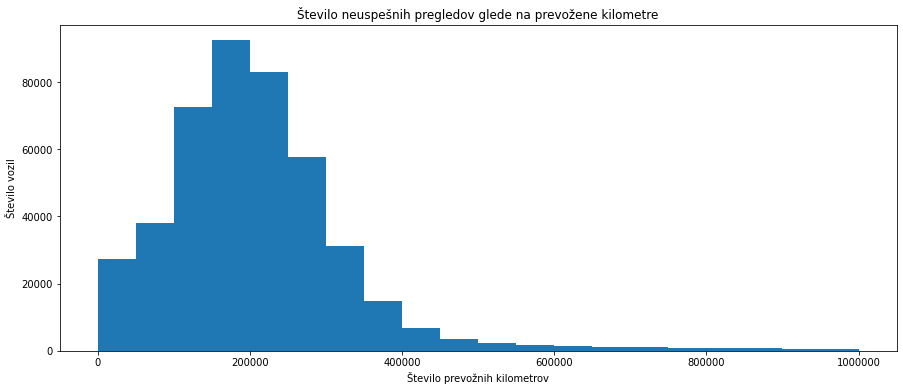

In [8]:
vsi_neuspesni_pregledi = []

for x in range(5):
    vsi_neuspesni_pregledi.extend(i for i in neuspesno_opravljeni[x]["PREVOZENI_KILOMETRI"].values if i < 1000000 and i >= 0)

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(vsi_neuspesni_pregledi, bins=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title("Število neuspešnih pregledov glede na prevožene kilometre")
ax.set_ylabel("Število vozil")
ax.set_xlabel("Število prevožnih kilometrov")


## Delež neopravljenih tehničnih pregledov glede na znamko

In [9]:
neuspesni_po_znamki = defaultdict(list)

for i,year in enumerate(years):
    for x in neuspesno_opravljeni[i]["ZNAMKA"].unique():
        if (x not in neuspesni_po_znamki.keys()):
            neuspesni_po_znamki[x] = [[],[]]
        a = len(neuspesno_opravljeni[i].loc[neuspesno_opravljeni[i]["ZNAMKA"] == x])
        b = len(data[year][1].loc[data[year][1]["ZNAMKA"] == x])
        
        neuspesni_po_znamki[x][0].append(a)
        neuspesni_po_znamki[x][1].append(b)

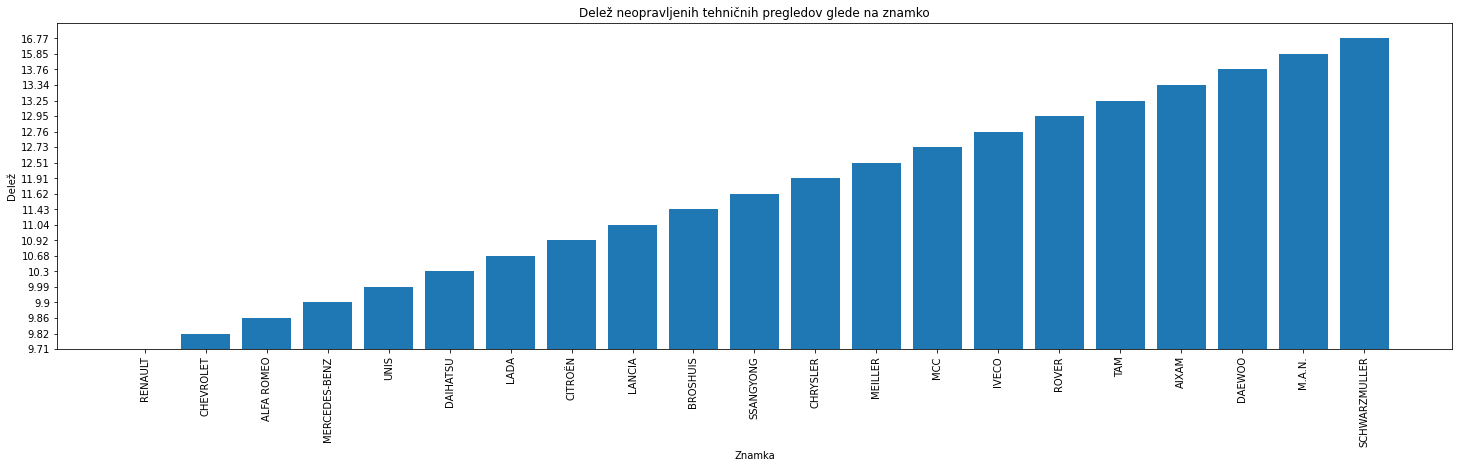

In [10]:
x = np.array([(k,round(v*100, 2)) for k, v in sorted({ x:sum(y[0])/sum(y[1]) for x,y in neuspesni_po_znamki.items() if sum(y[1]) > 1000 }.items(), key=lambda item: item[1], reverse=True)][20::-1])

plt.figure(figsize=(25,6))
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.bar(x[:,0], x[:,1])
plt.title("Delež neopravljenih tehničnih pregledov glede na znamko")
plt.xticks(rotation="vertical")
plt.ylabel("Delež")
plt.xlabel("Znamka")
plt.show()

## Število tehničnih pregledov in odstotek uspešnih pregledov

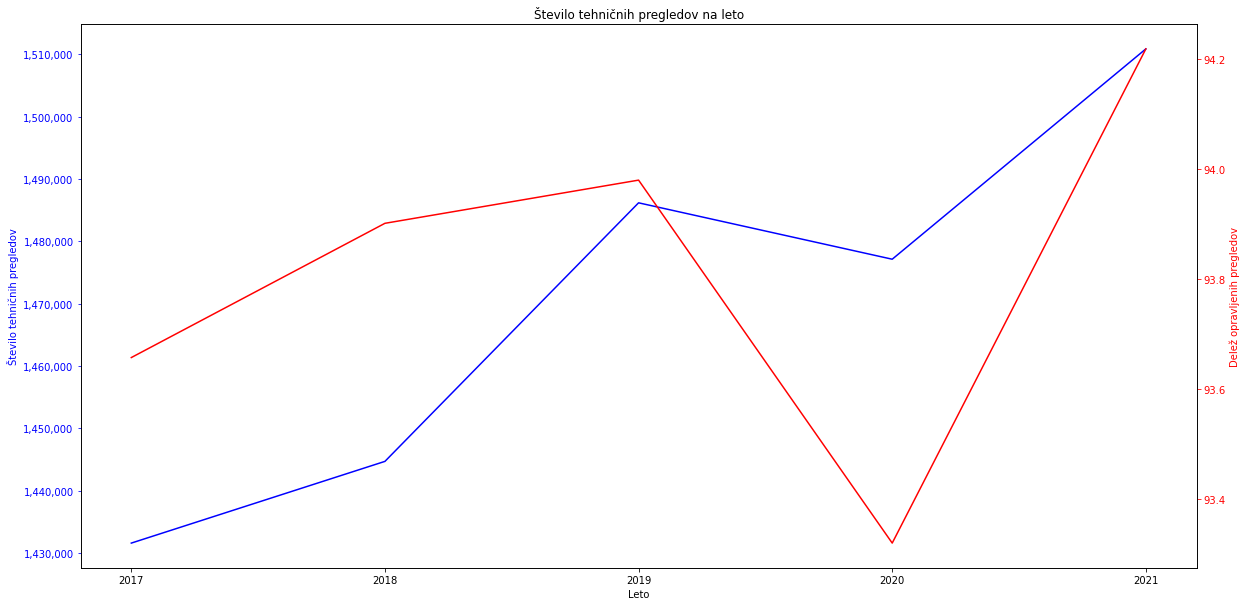

In [11]:
delez_neuspesnih_po_letih = [(1-len(neuspesno_opravljeni[i])/tehnicni_per_year[i])*100 for i in range(5)]

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()

ax.plot(data.keys(), tehnicni_per_year, color="blue")
ax.set_xlabel("Leto")
ax.set_ylabel("Število tehničnih pregledov", color="blue")
ax.set_title("Število tehničnih pregledov na leto")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis="y", colors="blue", which="both")


ax3 = ax.twinx()
ax3.plot(delez_neuspesnih_po_letih, color="red")
ax3.set_ylabel("Delež opravljenih pregledov", color="red")
ax3.tick_params(axis="y", colors="red", which="both")

plt.show()

## Uvozi vozil

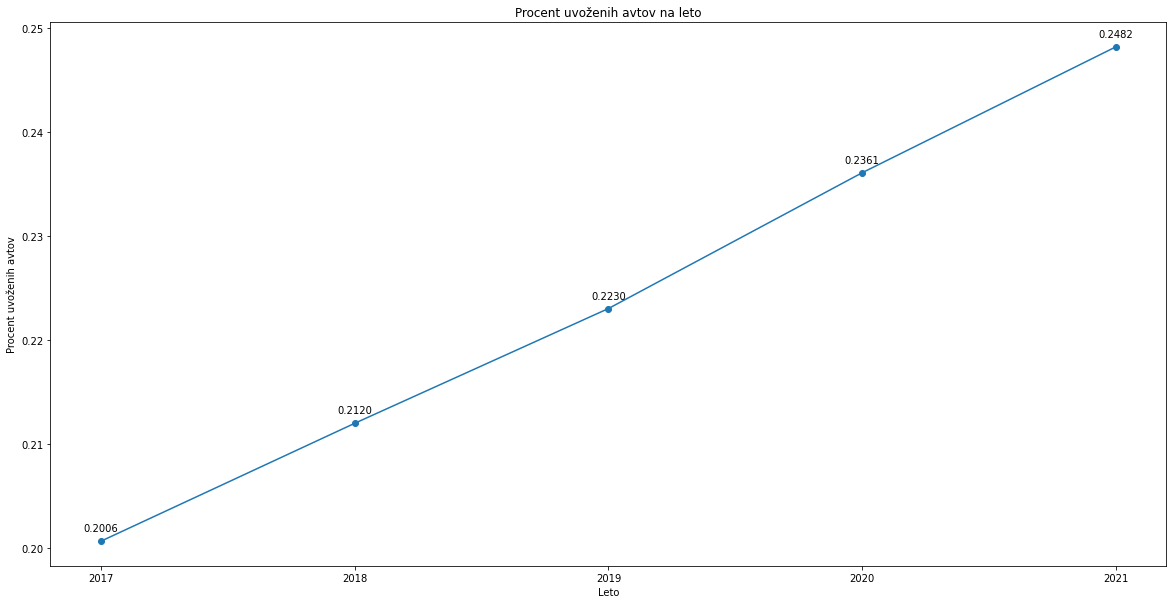

In [12]:
procent_uvozenih = dict()

procent_uvozenih["2017"] = (len(data["2017"][1]) - len(np.where(data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2017"][1])
procent_uvozenih["2018"] = (len(data["2018"][1]) - len(np.where(data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2018"][1])
procent_uvozenih["2019"] = (len(data["2019"][1]) - len(np.where(data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2019"][1])
procent_uvozenih["2020"] = (len(data["2020"][1]) - len(np.where(data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2020"][1])
procent_uvozenih["2021"] = (len(data["2021"][1]) - len(np.where(data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2021"][1])

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(procent_uvozenih.keys(), procent_uvozenih.values(), marker='o')
ax.set_xlabel("Leto")
ax.set_ylabel("Procent uvoženih avtov")
ax.set_title("Procent uvoženih avtov na leto")

for x, y in zip(procent_uvozenih.keys(), procent_uvozenih.values()):
    label = "{:.4f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

## Uvozena vozila v primerjavi z domestičnimi

In [13]:
uvozenaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

domesticnaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

In [14]:
stevu = 0
stevd = 0
vsad = 0
vsau = 0

for year in range(5):
    vsad += len(domesticnaVozila[year])
    vsau += len(uvozenaVozila[year])

    stevd += len(pd.merge(domesticnaVozila[year], neuspesno_opravljeni[year], how="inner"))
    stevu += len(pd.merge(uvozenaVozila[year], neuspesno_opravljeni[year], how="inner"))


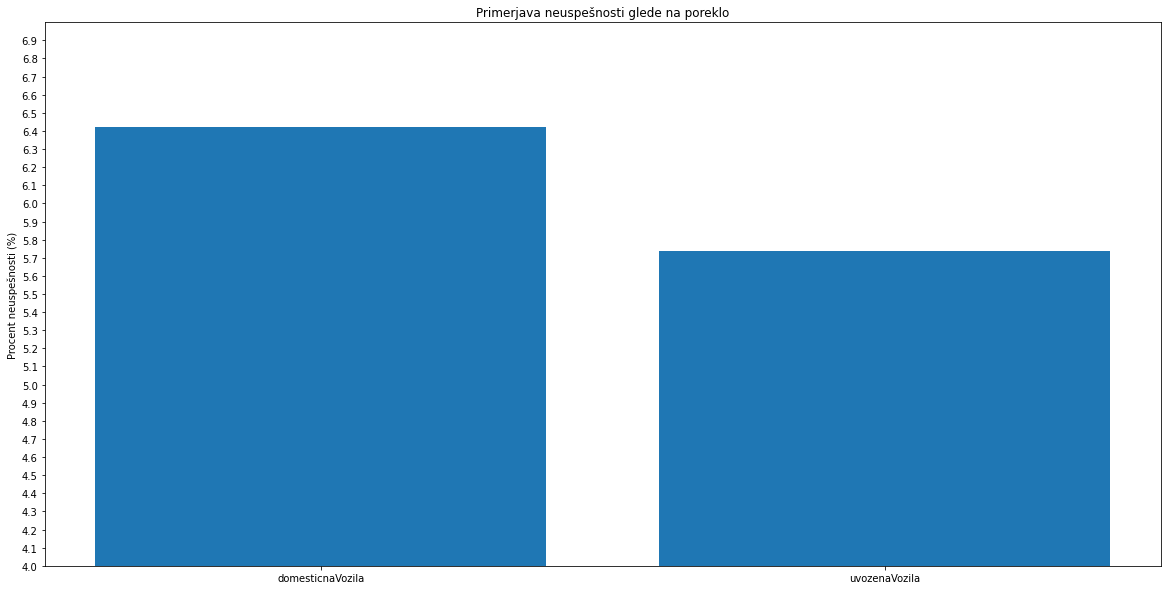

In [15]:
plt.bar(["domesticnaVozila", "uvozenaVozila"], [100*stevd/vsad, 100*stevu/vsau])
plt.yticks(np.arange(4, 7, 0.1))
plt.title("Primerjava neuspešnosti glede na poreklo")
plt.ylabel("Procent neuspešnosti (%)")
plt.ylim(4,7)
plt.show()

## Prevrteni kilometri

In [16]:
dict1 = data["2017"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict2 = data["2018"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict3 = data["2019"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict4 = data["2020"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict5 = data["2021"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()

dd = defaultdict(list)

for d in (dict1, dict2, dict3, dict4, dict5):
    for key, value in d.items():
        if(not math.isnan(value) and value != 0):
            dd[key].append(value)

In [17]:
prevtena_vozila = dict()

for x,v in dd.items():
    if(sorted(v) != v):
        prevtena_vozila[x] = v

In [18]:
df_prevtena_vozila = pd.DataFrame(prevtena_vozila.keys(),columns=["VIN"])

for year in years:
    df_prevtena_vozila = pd.merge(df_prevtena_vozila, data[year][1], how="left", on=["VIN"])

unikatna_prevrtena_vozila = df_prevtena_vozila.drop_duplicates(subset=["VIN"], keep="last")

print("Procent vozil s prevrtenimi kilometri: ", (len(prevtena_vozila) / (len(dict1) + len(dict2) + len(dict3) + len(dict4) + len(dict5))) * 100)

Procent vozil s prevrtenimi kilometri:  1.3190094154505432


array([<AxesSubplot:ylabel='ZNAMKA'>], dtype=object)

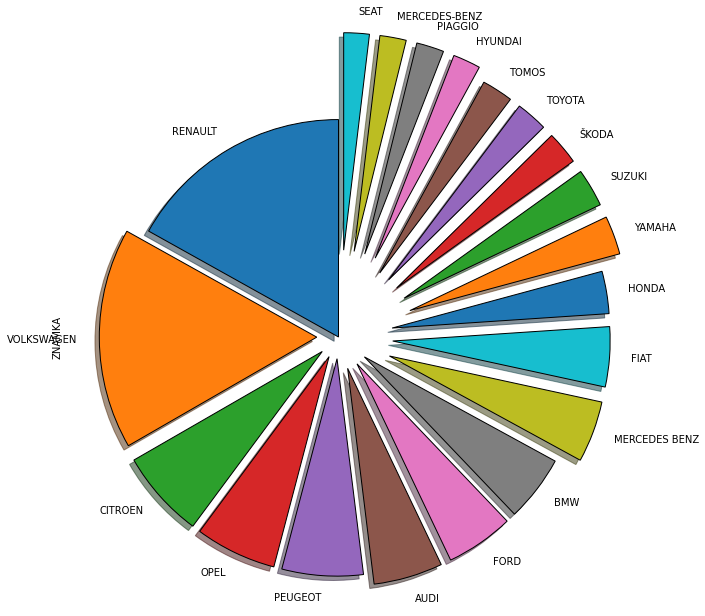

In [19]:
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4, 0.4]
unikatna_prevrtena_vozila["ZNAMKA"].value_counts(normalize=True)[:20].plot.pie(subplots=True,
                                                                                explode=explode,
                                                                                shadow = True,
                                                                                startangle = 90,
                                                                                wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"},
                                                                                textprops = dict(color ="black"))

array([<AxesSubplot:ylabel='NAMEN_VOZILA'>], dtype=object)

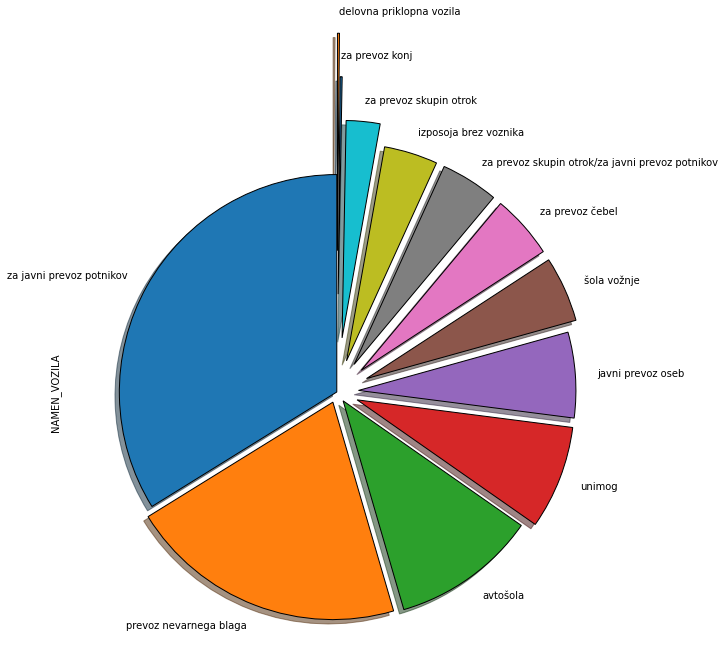

In [20]:
explode = [0, 0.05, 0.05, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.25, 0.45, 0.65]
unikatna_prevrtena_vozila["NAMEN_VOZILA"].value_counts(normalize=True)[:20].plot.pie(subplots=True,
                                                                                shadow = True,
                                                                                explode = explode,
                                                                                startangle = 90,
                                                                                wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"},
                                                                                textprops = dict(color ="black"))

## Izvozi vozil

In [21]:
izvozi_1 = data["2017"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_2 = data["2018"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_3 = data["2019"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_4 = data["2020"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_5 = data["2021"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()

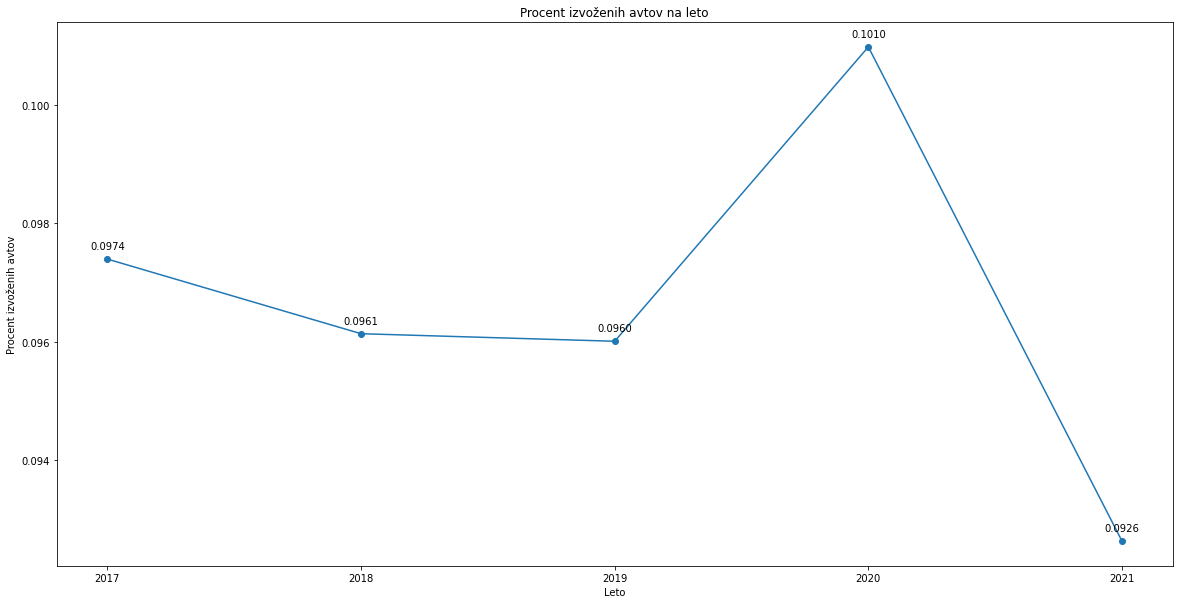

In [22]:
izvozi_procenti = dict()

izvozi_procenti["2017"] = 1 - len(izvozi_1) / len(data["2017"][1].loc[:, ["VIN"]])
izvozi_procenti["2018"] = 1 - len(izvozi_2) / len(data["2018"][1].loc[:, ["VIN"]])
izvozi_procenti["2019"] = 1 - len(izvozi_3) / len(data["2019"][1].loc[:, ["VIN"]])
izvozi_procenti["2020"] = 1 - len(izvozi_4) / len(data["2020"][1].loc[:, ["VIN"]])
izvozi_procenti["2021"] = 1 - len(izvozi_5) / len(data["2021"][1].loc[:, ["VIN"]])

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(izvozi_procenti.keys(), izvozi_procenti.values(), marker='o')
ax.set_xlabel("Leto")
ax.set_ylabel("Procent izvoženih avtov")
ax.set_title("Procent izvoženih avtov na leto")

for x, y in zip(izvozi_procenti.keys(), izvozi_procenti.values()):
    label = "{:.4f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()


In [23]:
dd = defaultdict(list)

for d in (izvozi_1, izvozi_2, izvozi_3, izvozi_4, izvozi_5):
    for key, value in d.items():
        dd[key].append(value)

izvozi = dict()

for x, y in dd.items():
    if (type(y[-1]) == str and int(y[-1].split(".")[2]) < 2022):
        izvozi[x] = y

In [24]:
df_izvozi_vozil = pd.DataFrame(izvozi.keys(),columns=["VIN"])

for year in years:
    df_izvozi_vozil = pd.merge(df_izvozi_vozil, data[year][1], how="left", on=["VIN"])

unikatna_izvozena_vozila = df_izvozi_vozil.drop_duplicates(subset=["VIN"], keep="last")

array([<AxesSubplot:ylabel='ZNAMKA'>], dtype=object)

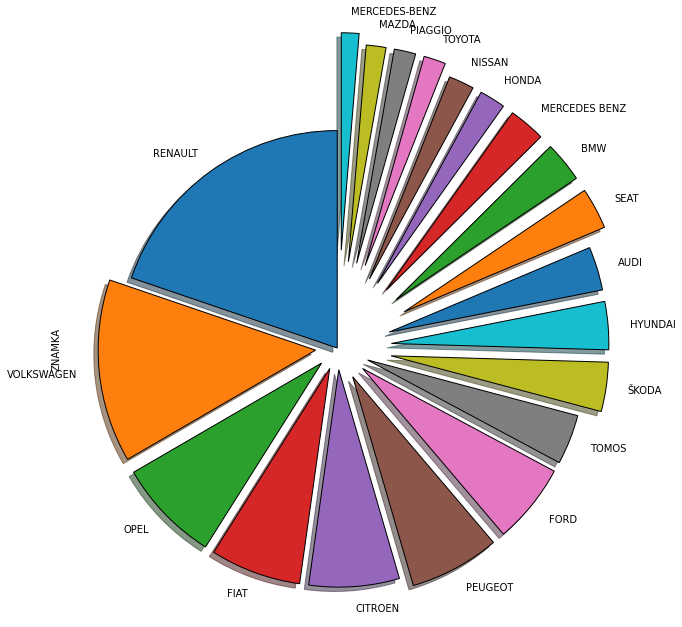

In [25]:
explode = [0, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4, 0.45]
unikatna_izvozena_vozila["ZNAMKA"].value_counts(normalize=True)[:20].plot.pie(subplots=True,
                                                                                shadow = True,
                                                                                explode = explode,
                                                                                startangle = 90,
                                                                                wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"},
                                                                                textprops = dict(color ="black"))